# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Lists for holding city data
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
#Counters
record_counter = 0
set_counter = 1
#Perform API Calls
print("Beginning Data Retrieval ")
print("-------------------------------")
#Base url, units and query url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
#Loop through cities
for index, city in enumerate(cities, start = 1):
    try:
#JSON        
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        if record_counter > 49:
            record_counter = 0
            set_counter = set_counter + 1
        else:
            record_counter = record_counter + 1
        print(f"Processing Record {record_counter} of Set {set_counter} : {city}")
#In case of error        
    except(KeyError, IndexError):
        print("City not found. Skipping...")       
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : zhezkazgan
Processing Record 2 of Set 1 : rabaul
Processing Record 3 of Set 1 : nome
Processing Record 4 of Set 1 : kruisfontein
Processing Record 5 of Set 1 : vaini
Processing Record 6 of Set 1 : georgetown
City not found. Skipping...
Processing Record 7 of Set 1 : hermanus
Processing Record 8 of Set 1 : dikson
Processing Record 9 of Set 1 : bethel
Processing Record 10 of Set 1 : sechura
Processing Record 11 of Set 1 : busselton
Processing Record 12 of Set 1 : birjand
Processing Record 13 of Set 1 : kodiak
Processing Record 14 of Set 1 : kapaa
Processing Record 15 of Set 1 : pangnirtung
Processing Record 16 of Set 1 : dunedin
Processing Record 17 of Set 1 : mawlaik
Processing Record 18 of Set 1 : teknaf
City not found. Skipping...
Processing Record 19 of Set 1 : bredasdorp
Processing Record 20 of Set 1 : hobart
Processing Record 21 of Set 1 : cherskiy
Processing Record 22 of Set 1 : yellowknife
Pr

Processing Record 31 of Set 4 : bajil
Processing Record 32 of Set 4 : honningsvag
Processing Record 33 of Set 4 : qui nhon
Processing Record 34 of Set 4 : tikhvin
Processing Record 35 of Set 4 : udaipura
Processing Record 36 of Set 4 : gorom-gorom
Processing Record 37 of Set 4 : novichikha
Processing Record 38 of Set 4 : kavaratti
Processing Record 39 of Set 4 : castro
Processing Record 40 of Set 4 : cuauhtemoc
Processing Record 41 of Set 4 : guantanamo
Processing Record 42 of Set 4 : praia da vitoria
Processing Record 43 of Set 4 : vilyuysk
Processing Record 44 of Set 4 : rapid valley
Processing Record 45 of Set 4 : svetlyy
Processing Record 46 of Set 4 : khatanga
Processing Record 47 of Set 4 : hof
Processing Record 48 of Set 4 : ponta delgada
Processing Record 49 of Set 4 : ancud
Processing Record 50 of Set 4 : havre-saint-pierre
Processing Record 0 of Set 5 : husavik
Processing Record 1 of Set 5 : port moresby
Processing Record 2 of Set 5 : belonia
Processing Record 3 of Set 5 : fl

Processing Record 16 of Set 8 : gerede
Processing Record 17 of Set 8 : nieuw amsterdam
Processing Record 18 of Set 8 : monrovia
Processing Record 19 of Set 8 : gorontalo
Processing Record 20 of Set 8 : obo
Processing Record 21 of Set 8 : petrivka
Processing Record 22 of Set 8 : eskisehir
City not found. Skipping...
Processing Record 23 of Set 8 : minsk
Processing Record 24 of Set 8 : roblin
Processing Record 25 of Set 8 : tabas
Processing Record 26 of Set 8 : huainan
Processing Record 27 of Set 8 : churachandpur
Processing Record 28 of Set 8 : la orilla
Processing Record 29 of Set 8 : baghdad
Processing Record 30 of Set 8 : geraldton
Processing Record 31 of Set 8 : barra do corda
Processing Record 32 of Set 8 : baykit
Processing Record 33 of Set 8 : songea
Processing Record 34 of Set 8 : santa rosa
Processing Record 35 of Set 8 : aklavik
Processing Record 36 of Set 8 : morehead
Processing Record 37 of Set 8 : deogarh
Processing Record 38 of Set 8 : tonstad
Processing Record 39 of Set 8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert Raw Data to DataFrame
weather_data = pd.DataFrame(
    {"City" : city_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
    }
)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhezkazgan,47.8043,67.7144,77.77,32,0,9.46,KZ,1623390651
1,Rabaul,-4.1967,152.1721,84.58,64,100,3.33,PG,1623390652
2,Nome,64.5011,-165.4064,43.16,87,90,5.75,US,1623390654
3,Kruisfontein,-34.0033,24.7314,59.94,44,45,8.59,ZA,1623390655
4,Vaini,-21.2000,-175.2000,73.56,78,40,10.36,TO,1623390657


In [5]:
#Export the city data into a .csv.
weather_data.to_csv("output_data/cities.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

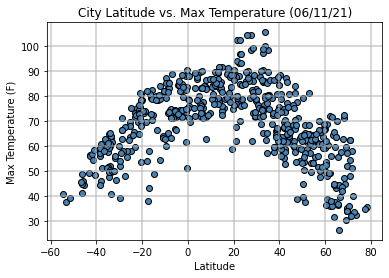

In [19]:
#Latitude vs. Temperature Plot
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.title('City Latitude vs. Max Temperature (06/11/21)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("output_data/Fig1.png")

## Latitude vs. Humidity Plot

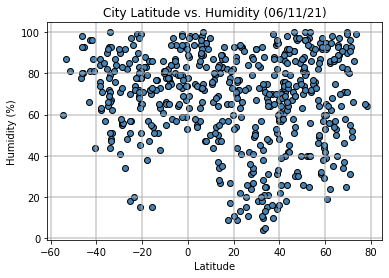

In [7]:
#Latitude vs. Humidity Plot
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.title('City Latitude vs. Humidity (06/11/21)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

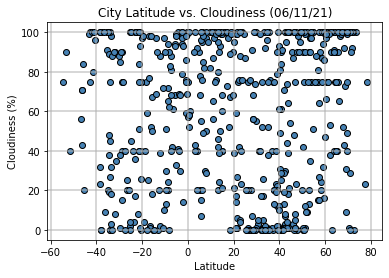

In [8]:
#Latitude vs. Cloudiness Plot
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.title('City Latitude vs. Cloudiness (06/11/21)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

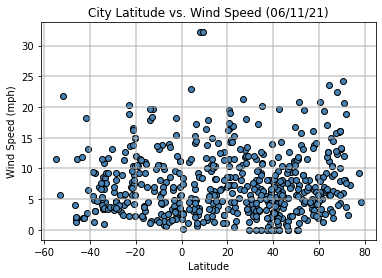

In [9]:
#Latitude vs. Wind Speed Plot
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.title('City Latitude vs. Wind Speed (06/11/21)')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("output_data/Fig4.png")

## Linear Regression

In [10]:
# Convert into Northern and Southern Hemisphere DataFrames
mask = weather_data['Lat'] > 0
northern_data = weather_data[mask]
southern_data = weather_data[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7270578788589481


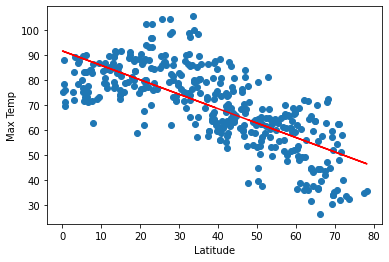

y = -0.58x + 91.67


In [11]:
x_values = northern_data["Lat"]
y_values = northern_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()
print(line_eq)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7418076854269046


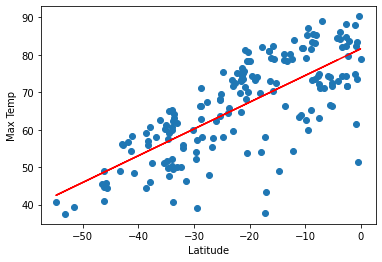

y = 0.71x + 81.59


In [12]:
x_values = southern_data["Lat"]
y_values = southern_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()
print(line_eq)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03968175672388133


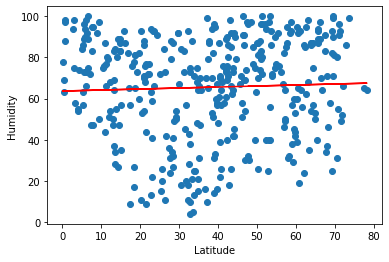

y = 0.05x + 63.68


In [13]:
x_values = northern_data["Lat"]
y_values = northern_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()
print(line_eq)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00809918801037742


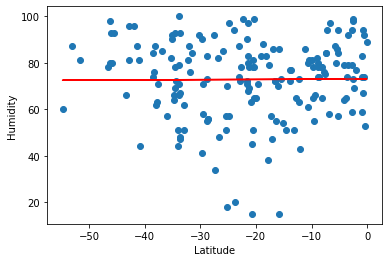

y = 0.01x + 73.03


In [14]:
x_values = southern_data["Lat"]
y_values = southern_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()
print(line_eq)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.055212515242317725


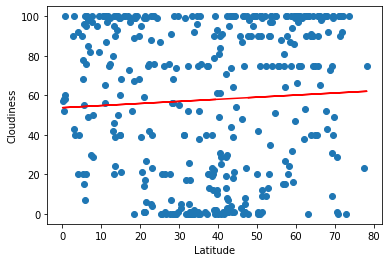

y = 0.11x + 53.75


In [15]:
x_values = northern_data["Lat"]
y_values = northern_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()
print(line_eq)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05947762326255485


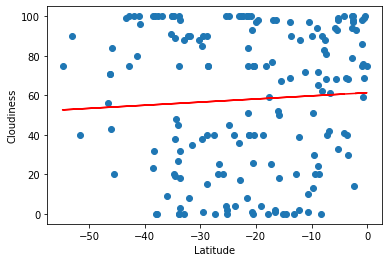

y = 0.16x + 61.3


In [16]:
x_values = southern_data["Lat"]
y_values = southern_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()
print(line_eq)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.061206433104645123


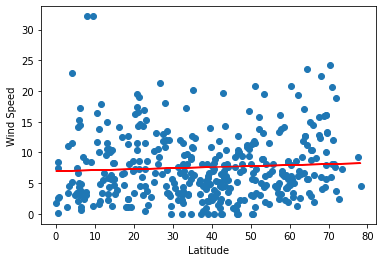

y = 0.02x + 6.96


In [17]:
x_values = northern_data["Lat"]
y_values = northern_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()
print(line_eq)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017421386076613372


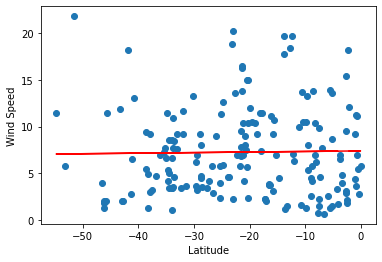

y = 0.01x + 7.4


In [18]:
x_values = southern_data["Lat"]
y_values = southern_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()
print(line_eq)